# **Regularisation**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

## **Acessing the Dataset**

In [2]:
from tensorflow.keras.datasets.mnist import load_data 
(X_train, y_train),(X_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## **Visualisation**

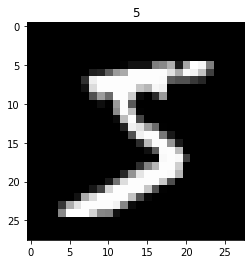

In [6]:
plt.imshow(X_train[0],'gray')
plt.title(y_train[0]);

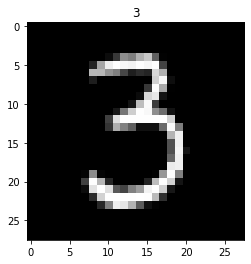

In [7]:
plt.imshow(X_train[50],'gray')
plt.title(y_train[50]);

## **1. Building a Basic Model**

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3320 - accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3456 - accuracy: 0.9251
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9369
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2498 - accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2345 - accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2162 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2054 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2001 - accuracy: 0.9559
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1936 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.185

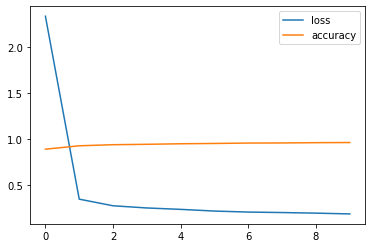

In [15]:
# Model Building 

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_1.add(tf.keras.layers.Dense(300, activation='relu'))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training 

tf.random.set_seed(100)
hist_1 = model_1.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_1.history).plot();

In [16]:
print('Evaluation Result')

model_1.evaluate(X_test, y_test)

Evaluation Result
313/313 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.9537


[0.31031742691993713, 0.9537000060081482]

## **Remark 1:**

Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 

Hence there is Overfitting 

## **2. Model with Normalised Data**

In [19]:
normaliser = tf.keras.layers.Normalization()
normaliser.adapt(X_train) # adapt - We use this asking the normaliser to adapt to the dataset which is 3-Dimensional. In case of 2-D, we use StandardScaler, but here we use normaliser.adapt asking it to adapt to the 3-D Data 
normaliser.adapt(X_test)
X_train = normaliser(X_train)
X_test = normaliser(X_test)

In [20]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-01, -4.51524764e-01,
        -3.54017019e-01, -2.68543184e-01, -1.91750199e-01,
        -1.24660455e-01, -6.43352345e-02, -2.87100654e-02,
        -8.99783615e-03],
       [-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-0

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

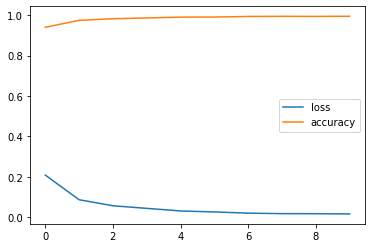

In [21]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_2.add(tf.keras.layers.Dense(300, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training 

tf.random.set_seed(100)
hist_2 = model_2.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

In [22]:
print('Evaluation Result 2')

model_2.evaluate(X_test, y_test)

Evaluation Result 2
313/313 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9788


[0.14703814685344696, 0.9787999987602234]

## **Remark 2:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470

Model has improved, but still there is Overfitting 

## **3. Model with Validation**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1124 - val_accuracy:

[0.14034612476825714, 0.9761999845504761]

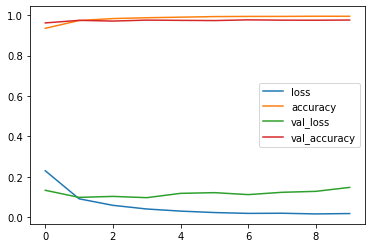

In [27]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_3.add(tf.keras.layers.Dense(300, activation='relu'))
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training 

tf.random.set_seed(100)

# Validation Split

hist_3 = model_3.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 3')

model_3.evaluate(X_test, y_test)

## **Remark 3:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model improved, Overfitting)

Model has further improved

## **4. Model with Dropout**

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2436 - accuracy: 0.9305 - val_loss: 0.1401 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.0954 - val_accuracy: 0.9719
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0730 - accuracy: 0.9788 - val_loss: 0.0934 - val_accuracy: 0.9734
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.1050 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.1014 - val_accuracy: 0.9757
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.1140 - val_accuracy: 0.9746
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.1100 - val_accuracy

[0.14748935401439667, 0.9753999710083008]

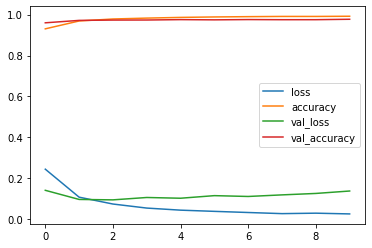

In [29]:
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_4.add(tf.keras.layers.Dense(300, activation='relu'))

# Dropout Layer
model_4.add(tf.keras.layers.Dropout(0.1)) # 10% of the neurons will be dropped 
 
model_4.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training 

tf.random.set_seed(100)

# Validation Split

hist_4 = model_4.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_4.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 4')

model_4.evaluate(X_test, y_test)

## **Remark 4:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not improved, Retain the third Model model_3)


## **5. Model with Early Stop**

We will take the model number 3 as it is the best 

Taking Model 3 and renaming it 5 

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731



Evaluation Result 5
313/313 [==============================] - 1s 3ms/step - loss: 0.1281 - accuracy: 0.9729


[0.12814894318580627, 0.9728999733924866]

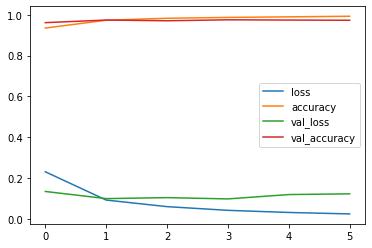

In [31]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_5.add(tf.keras.layers.Dense(300, activation='relu'))
model_5.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Introducing Early Stop

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training 

tf.random.set_seed(100)

# Validation Split , Callbacks 

hist_5 = model_5.fit(X_train,y_train,epochs=10, validation_split=0.2, callbacks=[early_stop])
pd.DataFrame(hist_5.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 5')

model_5.evaluate(X_test, y_test)

## **Remark 5:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not improved, Retain the third Model model_3)

5. Model with Early Stop: Training Loss = 0.0237, Test Loss = 0.1281 (Model Improved, Retain the model)

## **6. Model with Batch Normalisation**

Taking Model number 5 and renaming it as Model 6

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2505 - accuracy: 0.9266 - val_loss: 0.1500 - val_accuracy: 0.9624
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1163 - accuracy: 0.9654 - val_loss: 0.1802 - val_accuracy: 0.9683
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0871 - accuracy: 0.9736 - val_loss: 0.1132 - val_accuracy: 0.9724
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.1028 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.1570 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.1737 - val_accuracy: 0.9728



Evaluation Result 6
313/313 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9727


[0.15648391842842102, 0.9726999998092651]

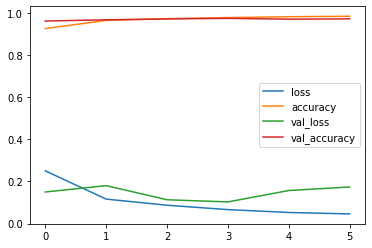

In [32]:
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_6.add(tf.keras.layers.Dense(300, activation='relu'))

# Batch Normalisation Layer

model_6.add(tf.keras.layers.BatchNormalization())

model_6.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Introducing Early Stop

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training 

tf.random.set_seed(100)

# Validation Split , Callbacks 

hist_6 = model_6.fit(X_train,y_train,epochs=10, validation_split=0.2, callbacks=[early_stop])
pd.DataFrame(hist_6.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 6')

model_6.evaluate(X_test, y_test)

## **Remark 6:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not improved, Retain the third Model model_3)

5. Model with Early Stop: Training Loss = 0.0237, Test Loss = 0.1281 (Model Improved, Retain the model)

6. Model with Batch Normalization: Training Loss = 0.0458, Test Loss = 0.1565 (Model Not improved, So Retain the Model 5, model_5)

## **7. Model with 2 Hidden Layers**

Taking model 5 and renaming it as model 7

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2250 - accuracy: 0.9337 - val_loss: 0.1441 - val_accuracy: 0.9581
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0938 - accuracy: 0.9718 - val_loss: 0.1103 - val_accuracy: 0.9692
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0661 - accuracy: 0.9809 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0990 - val_accuracy: 0.9754
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.1237 - val_accuracy: 0.9688
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.1329 - val_accuracy: 0.9712



Evaluation Result 7
313/313 [==============================] - 1s 2ms/step - loss: 0.1289 - accuracy: 0.9710


[0.12887224555015564, 0.9710000157356262]

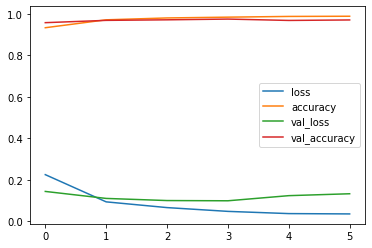

In [34]:
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_7.add(tf.keras.layers.Dense(300, activation='relu'))

# Adding one more layer 

model_7.add(tf.keras.layers.Dense(100, activation='relu'))

model_7.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Introducing Early Stop

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training 

tf.random.set_seed(100)

# Validation Split , Callbacks 

hist_7 = model_7.fit(X_train,y_train,epochs=10, validation_split=0.2, callbacks=[early_stop])
pd.DataFrame(hist_7.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 7')

model_7.evaluate(X_test, y_test)

## **Remark 7:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model imporoved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not imporoved, Retain the third Model model_3)

5. Model with Early Stop: Training Loss = 0.0237, Test Loss = 0.1281 (Model Improved, Retain the model)

6. Model with Batch Normalization: Training Loss = 0.0458, Test Loss = 0.1565 (Model Not improved, So Retain the Model 5, model_5)

7. Model with 2 Hidden Layers: Training Loss = 0.0356 , Test Loss = 0.01289 (Model Not improved, Retain the Model 5, model_5)

## **8. Trying Model 5 with 2 Hidden Layers and more units in the 2nd Layer**

model 5 renamed as model 8, 2nd Hidden Layer units increased from 100 to 200

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2238 - accuracy: 0.9339 - val_loss: 0.1479 - val_accuracy: 0.9568
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0930 - accuracy: 0.9725 - val_loss: 0.1058 - val_accuracy: 0.9691
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0628 - accuracy: 0.9804 - val_loss: 0.1107 - val_accuracy: 0.9688
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.1123 - val_accuracy: 0.9721



Evaluation Result 8
313/313 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9719


[0.11052156984806061, 0.9718999862670898]

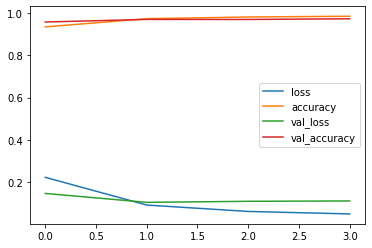

In [36]:
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1
model_8.add(tf.keras.layers.Dense(300, activation='relu'))

# Adding one more layer 

model_8.add(tf.keras.layers.Dense(200, activation='relu'))

model_8.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Introducing Early Stop

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training 

tf.random.set_seed(100)

# Validation Split , Callbacks 

hist_8 = model_8.fit(X_train,y_train,epochs=10, validation_split=0.2, callbacks=[early_stop])
pd.DataFrame(hist_8.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 8')

model_8.evaluate(X_test, y_test)

## **Remark 8:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model imporoved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not imporoved, Retain the third Model model_3)

5. Model with Early Stop: Training Loss = 0.0237, Test Loss = 0.1281 (Model Improved, Retain the model)

6. Model with Batch Normalization: Training Loss = 0.0458, Test Loss = 0.1565 (Model Not improved, So Retain the Model 5, model_5)

7. Model with 2 Hidden Layers: Training Loss = 0.0356 , Test Loss = 0.1289 (Model Not improved, Retain the Model 5, model_5)

8. Model 8 with 2 Hidden Layers and more units: Training Loss = 0.0512 , Test Loss = 0.1105 (Model improved)

## **9. Trying Model 5 with only 1 Hidden Layer but with less units in the  Hidden Layer**

model 5 renamed as model 9, Hidden Layer units reduced from 300 to 50

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9107 - val_loss: 0.1931 - val_accuracy: 0.9446
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9583 - val_loss: 0.1376 - val_accuracy: 0.9595
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1230 - val_accuracy: 0.9641
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.1248 - val_accuracy: 0.9664
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.1286 - val_accuracy: 0.9643



Evaluation Result 9
313/313 [==============================] - 1s 1ms/step - loss: 0.1277 - accuracy: 0.9656


[0.12774796783924103, 0.9656000137329102]

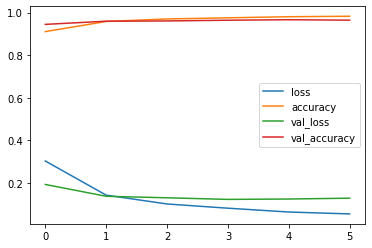

In [37]:
model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Flatten()) # Flatten - Making a single dimension from 28X28 into 784X1

# Reducing number of units from 300 to 50

model_9.add(tf.keras.layers.Dense(50, activation='relu'))

model_9.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the Model

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Introducing Early Stop

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training 

tf.random.set_seed(100)

# Validation Split , Callbacks 

hist_9 = model_9.fit(X_train,y_train,epochs=10, validation_split=0.2, callbacks=[early_stop])
pd.DataFrame(hist_9.history).plot();

# Evaluation

print('\n\n')
print('Evaluation Result 9')

model_9.evaluate(X_test, y_test)

## **Remark 9:**

1. Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

2. Normalised Model: Training Loss = 0.0170, Test Loss = 0.1470 (Model improved, Overfitting)

3. Model with Validation: Training Loss = 0.1481 , Test Loss = 0.1403 (Model imporoved, Overfitting)

4. Model with Dropout: Training Loss = 0.0246 , Test Loss =  0.1475 (Model Not imporoved, Retain the third Model model_3)

5. Model with Early Stop: Training Loss = 0.0237, Test Loss = 0.1281 (Model Improved, Retain the model)

6. Model with Batch Normalization: Training Loss = 0.0458, Test Loss = 0.1565 (Model Not improved, So Retain the Model 5, model_5)

7. Model with 2 Hidden Layers: Training Loss = 0.0356 , Test Loss = 0.1289 (Model Not improved, Retain the Model 5, model_5)

8. Model 8 with 2 Hidden Layers and more units: Training Loss = 0.0512 , Test Loss = 0.1105 (Model improved)

9. Model 9 with 1 Hidden Layer but lesser units: Training Loss = 0.0548 , Test Loss = 0.1277 (Model Not improved, Retain model 8)


# **BEST Model - MODEL 8**

## **Saving the Model**

In [38]:
model_8.save('best_mnist_model.h5')

## **Loading the Model**

In [39]:
my_mnist = tf.keras.models.load_model('best_mnist_model.h5')

In [40]:
my_mnist.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1105 - accuracy: 0.9719


[0.11052156984806061, 0.9718999862670898]